In [7]:
import time

from matplotlib import pyplot as plt

from src.em import em_algorithm
from src.graphs import random_graph
from src.utils import sort_parameters

implementations = ["pytorch", "pytorch_log", "numpy", "pytorch_low_memory"]

In [8]:
def benchmark(n, Q, runs=10, iterations=10):
    X, _, alpha, pi = random_graph(n, Q)
    alpha, pi = sort_parameters(alpha, pi)
    times = []

    for implementation in implementations:
        times.append([])
        for i in range(runs):
            print("Run", i + 1, "with", implementation, "implementation", end="\r")
            start_time = time.time()
            em_algorithm(
                X,
                Q,
                n_init=1,
                iterations=iterations,
                implementation=implementation,
                verbose=False,
            )
            times[-1].append(time.time() - start_time)
    return times

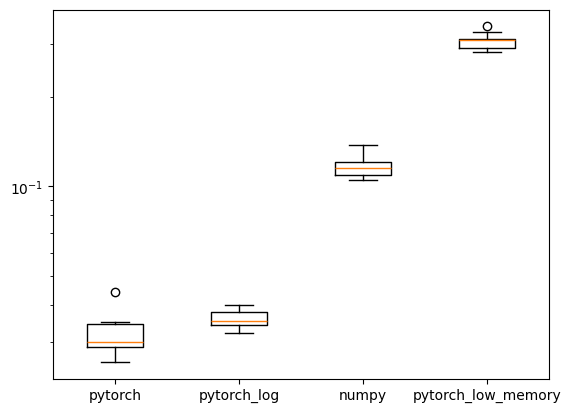

In [9]:
Q = 3
n = 100
times = benchmark(n, Q)

plt.boxplot(times, labels=implementations)
plt.yscale("log")
plt.show()